# Importando librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display #para mostrar más de un elemento por celda de Jupyter

# Misión 0: Aspectos Básicos

In [2]:
df = pd.read_csv("data_E2.csv")

Recordatorio:
- Lo que hace "head" es retornar las primeras n filas del DataFrame.
- Lo que hace "display" es mostrar la salida de la celda en un formato más amigable.

In [3]:
display(df.head(10))

,Year,Month,Day,O3,PM2.5,Environmental_risk
0,2008,1,1,29.63,NaN,NaN
1,2008,1,2,21.46,NaN,NaN
2,2008,1,3,24.25,NaN,NaN
3,2008,1,4,29.04,NaN,NaN
4,2008,1,5,30.17,NaN,NaN
5,2008,1,6,29.50,NaN,NaN
6,2008,1,7,26.79,NaN,NaN
7,2008,1,8,25.29,NaN,NaN
8,2008,1,9,14.62,NaN,NaN
9,2008,1,10,18.17,NaN,NaN


Por ejemplo, sin usar display el resultado de la celda sería:

In [4]:
print(df.head(10))

   Year  Month  Day     O3  PM2.5 Environmental_risk
0  2008      1    1  29.63    NaN                NaN
1  2008      1    2  21.46    NaN                NaN
2  2008      1    3  24.25    NaN                NaN
3  2008      1    4  29.04    NaN                NaN
4  2008      1    5  30.17    NaN                NaN
5  2008      1    6  29.50    NaN                NaN
6  2008      1    7  26.79    NaN                NaN
7  2008      1    8  25.29    NaN                NaN
8  2008      1    9  14.62    NaN                NaN
9  2008      1   10  18.17    NaN                NaN


Recordatorio: Lo que hace "describe" es retornar una descripción estadística del DataFrame. Solo se aplica a columnas numéricas.

La descripción incluye:
- count: Cantidad de elementos no nulos.
- mean: Promedio de los elementos.
- std: Desviación estándar de los elementos.
- min: Valor mínimo de los elementos.
- 25%: Primer cuartil de los elementos.
- 50%: Mediana de los elementos.
- 75%: Tercer cuartil de los elementos.
- max: Valor máximo de los elementos.

In [5]:
df.describe()

,Year,Month,Day,O3,PM2.5
count,2984.000000,2984.000000,2984.000000,2878.000000,2725.000000
mean,2011.592493,6.419236,15.715818,16.313767,28.814594
std,2.357040,3.487660,8.804066,7.995680,17.479388
min,2008.000000,1.000000,1.000000,1.000000,5.000000
25%,2010.000000,3.000000,8.000000,9.392500,16.170000
50%,2012.000000,6.000000,16.000000,16.960000,23.210000
75%,2014.000000,9.000000,23.000000,22.357500,37.210000
max,2016.000000,12.000000,31.000000,56.300000,126.200000


Recordatorio: 
- Para los valores no númericos se puede ver su distribución de frecuencia a fin de realizar un análisis de sus valores
- Lo que hace "value_counts" es contar la cantidad de veces que se repite cada valor en la columna.

In [6]:
environmental_risk = df["Environmental_risk"]
display(environmental_risk)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
2979     Bajo
2980     Bajo
2981     Bajo
2982    medio
2983    medio
Name: Environmental_risk, Length: 2984, dtype: object

In [7]:
environmental_risk.value_counts()

Environmental_risk
medio      1605
Bajo        750
nulo        134
Alto        106
extremo      61
Name: count, dtype: int64

# Misión 1: Limpieza y depuración

## Valores extremos

### Columna O3

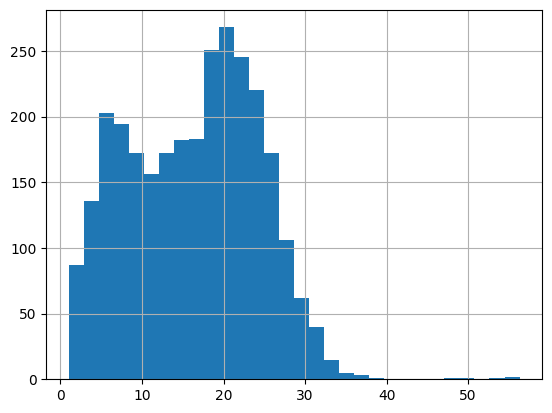

In [8]:
df['O3'].hist(bins=30)
plt.show()

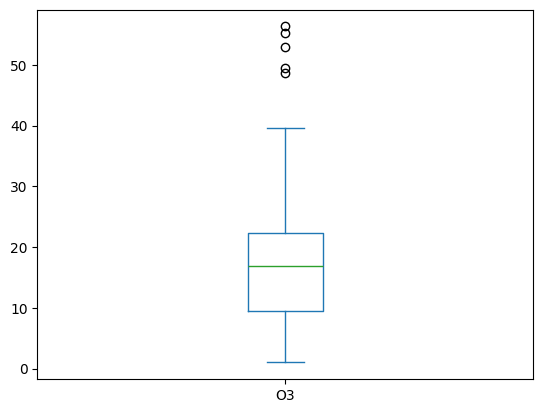

In [9]:
df['O3'].plot.box()
plt.show()

#### Corrigiendo valores extremos

Recordatorio:

- Lo que hace "loc" es acceder a un grupo de filas y columnas por etiqueta(s) o una matriz booleana.

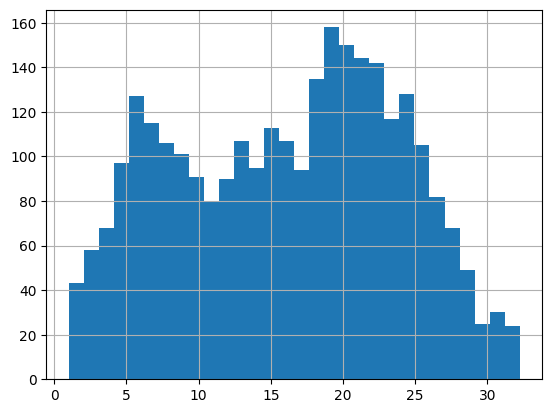

In [10]:
umbral_O3 = df["O3"].mean() + 2 * df["O3"].std()
df = df.loc[df["O3"] <= umbral_O3]
df["O3"].hist(bins=30)
plt.show()

In [11]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Year                    0
Month                   0
Day                     0
O3                      0
PM2.5                 221
Environmental_risk    221
dtype: int64

#### Revisando los gráficos

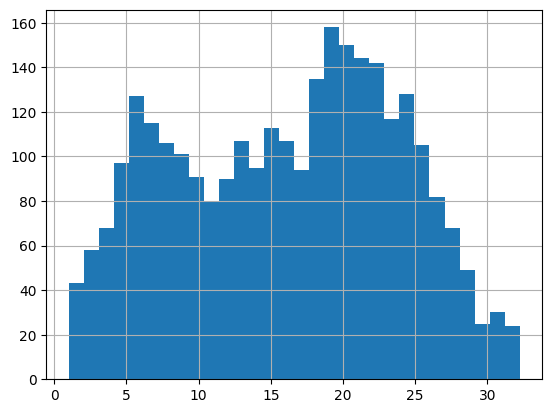

In [12]:
df['O3'].hist(bins=30)
plt.show()

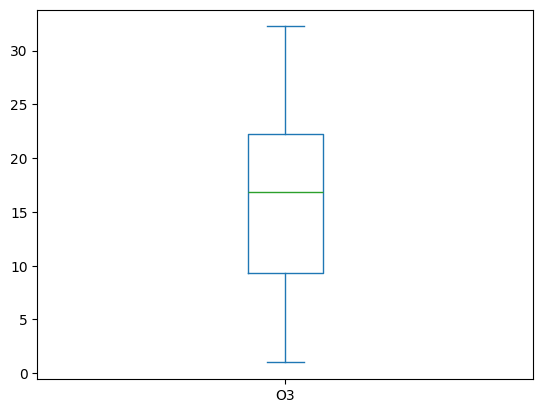

In [13]:
df['O3'].plot.box()
plt.show()

### Columna PM2.5

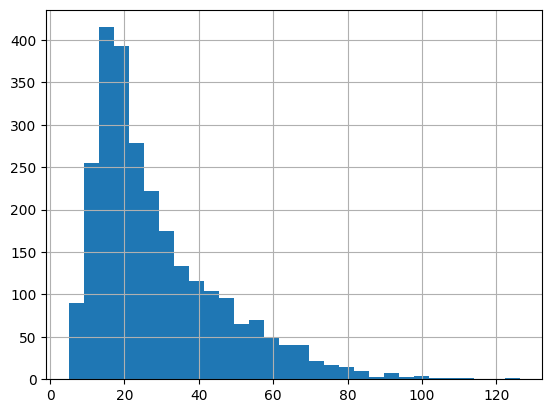

In [14]:
df['PM2.5'].hist(bins=30)
plt.show()

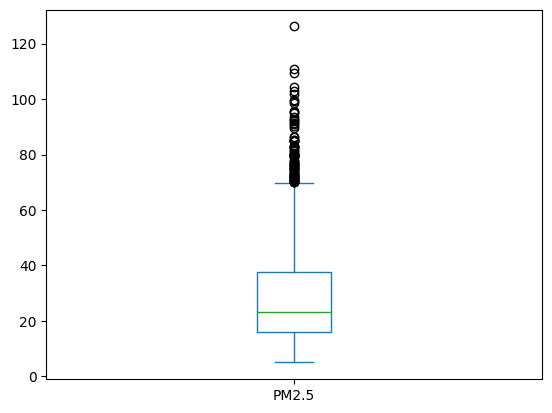

In [15]:
df['PM2.5'].plot.box()
plt.show()

#### Corrigiendo valores extremos

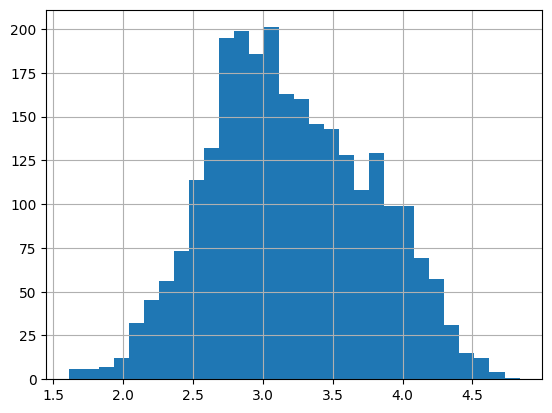

In [16]:
df['PM2.5'] = np.log(df['PM2.5'])
df['PM2.5'].hist(bins=30)
plt.show()

#### Revisando los gráficos

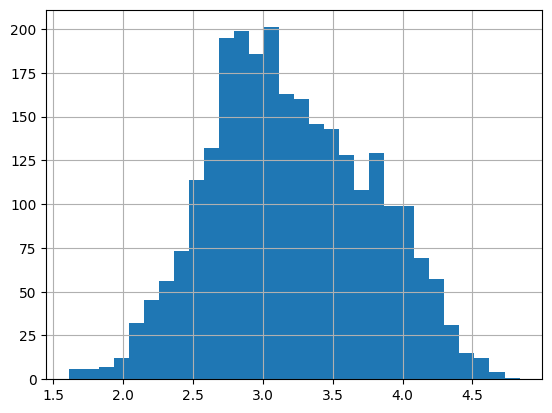

In [17]:
df['PM2.5'].hist(bins=30)
plt.show()

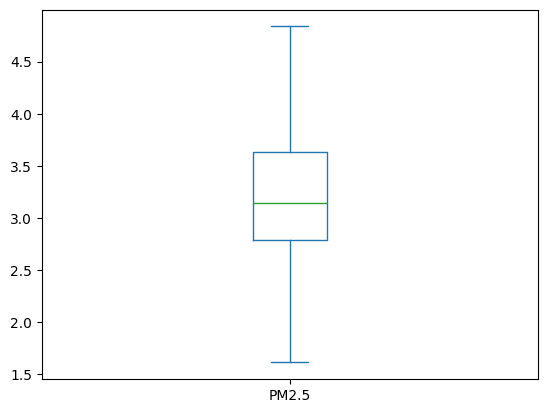

In [18]:
df['PM2.5'].plot.box()
plt.show()

## Valores Nulos

Recordatorio: 

- Lo que hace "apply" es aplicar una función a las filas o columnas del DataFrame, cuando axis=0 se aplica a las columnas y cuando axis=1 se aplica a las filas.
- Lo que hace "isnull" es retornar un DataFrame con valores booleanos que indican si un valor es nulo o no.
- Lo que hace "sum" es sumar los valores de un DataFrame, en este caso, los valores booleanos se interpretan como 1 (True) y 0 (False).

In [19]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Year                    0
Month                   0
Day                     0
O3                      0
PM2.5                 221
Environmental_risk    221
dtype: int64

Se crean copias de los dataframes para no modificar el original y ejecutar las correcciones en las copias.

In [20]:
df_mean = df.copy()
df_delete = df.copy()

Recordatorio:
- Lo que hace "fillna" es rellenar los valores nulos con un valor específico, de un DataFrame o Serie, con el valor que se pasa como parámetro. Se asigna el valor resultante a una variable ya que no modifica el DataFrame original.

In [21]:
df_mean['O3'] = df_mean['O3'].fillna(df['O3'].mean())
df_mean['PM2.5'] = df_mean['PM2.5'].fillna(df['PM2.5'].mean())


Recordatorio:
- Lo que hace "dropna" es eliminar las filas que contienen valores nulos, de un DataFrame o Serie. Se asigna el valor resultante a una variable ya que no modifica el DataFrame original. Se puede usar el parámetro "subset" para indicar las columnas a considerar para eliminar los valores nulos.

In [22]:
df_delete = df_delete.dropna(subset=['O3', 'PM2.5'])

## Misión 2

In [23]:
mean_O3 = df_mean['O3'].mean()
std_O3 = df_mean['O3'].std()
max_O3 = df_mean['O3'].max()
min_O3 = df_mean['O3'].min()
kurtosis_O3 = df_mean['O3'].kurtosis()

mean_PM25 = df_mean['PM2.5'].mean()
std_PM25 = df_mean['PM2.5'].std()
max_PM25 = df_mean['PM2.5'].max()
min_PM25 = df_mean['PM2.5'].min()
kurtosis_PM25 = df_mean['PM2.5'].kurtosis()

corr_O3_PM25 = df_mean['O3'].corr(df_mean['PM2.5'])

tabla_ordenda = pd.DataFrame({
    'Estadístico': ['Media', 'Desviación estándar', 'Máximo', 'Mínimo', 'kurtosis', 'Correlación O3-PM2.5'],
    'O3': [mean_O3, std_O3, max_O3, min_O3, kurtosis_O3, corr_O3_PM25],
    'PM2.5': [mean_PM25, std_PM25, max_PM25, min_PM25, kurtosis_PM25, '']
})

display(tabla_ordenda)
     

,Estadístico,O3,PM2.5
0,Media,16.101095,3.201035
1,Desviación estándar,7.716965,0.549828
2,Máximo,32.250000,4.837868
3,Mínimo,1.000000,1.609438
4,kurtosis,-1.035962,-0.343846
5,Correlación O3-PM2.5,-0.444078,


# Misión 3: Visualización

## Dataframe que se corrigió con la media 

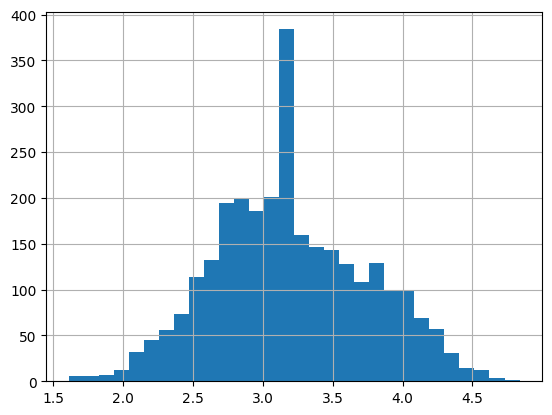

In [24]:
df_mean['PM2.5'].hist(bins=30)
plt.show()

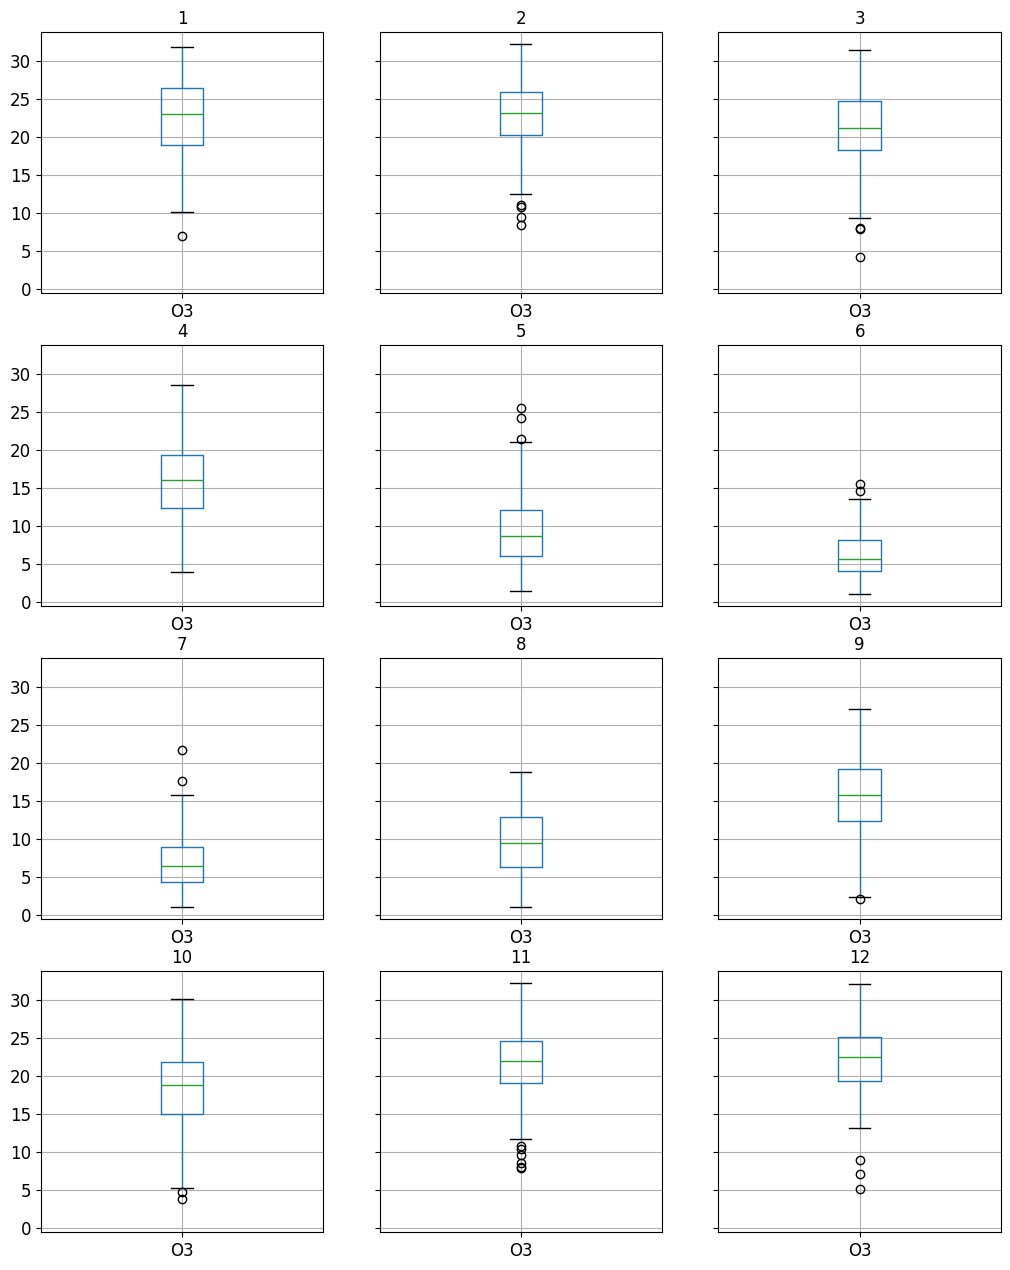

In [25]:
df_mean.groupby('Month').boxplot(column='O3', fontsize=12, figsize=(12, 16))
plt.show()

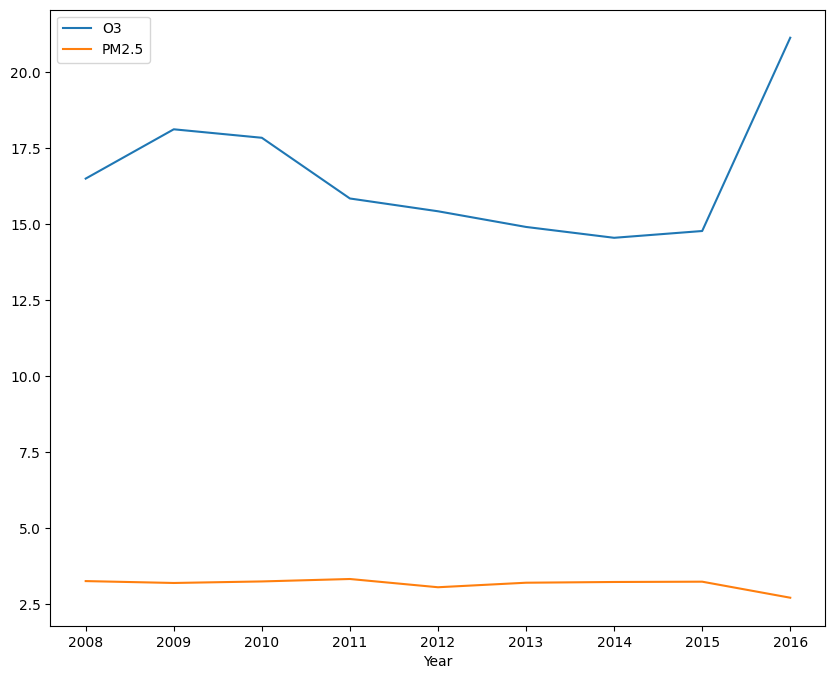

In [26]:
df_mean.groupby("Year")[["O3", "PM2.5"]].mean().plot.line(figsize=(10, 8))
plt.show()

## Dataframe que se corrigió eliminando filas con valores nulos

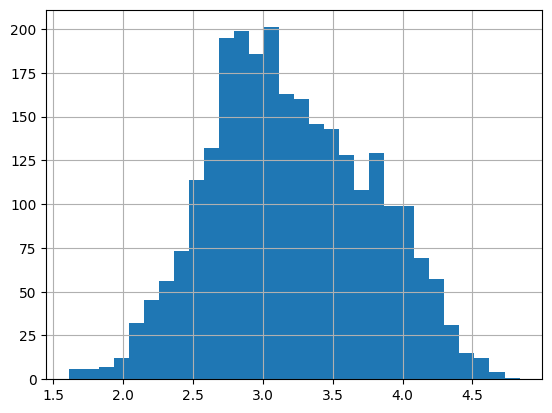

In [27]:
df_delete['PM2.5'].hist(bins=30)
plt.show()

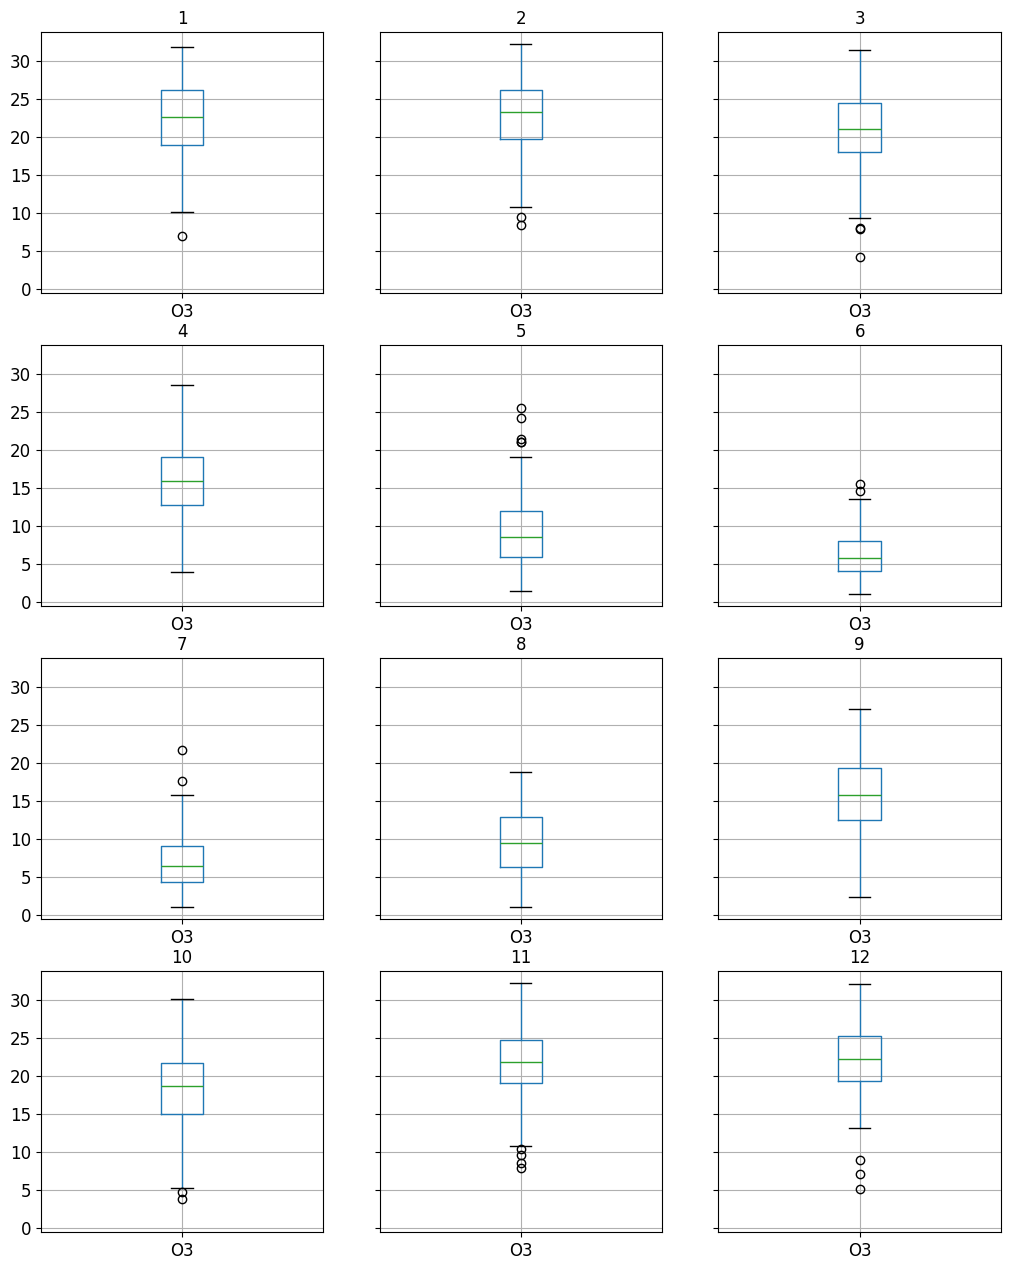

In [28]:
df_delete.groupby('Month').boxplot(column='O3', fontsize=12, figsize=(12, 16))
plt.show()

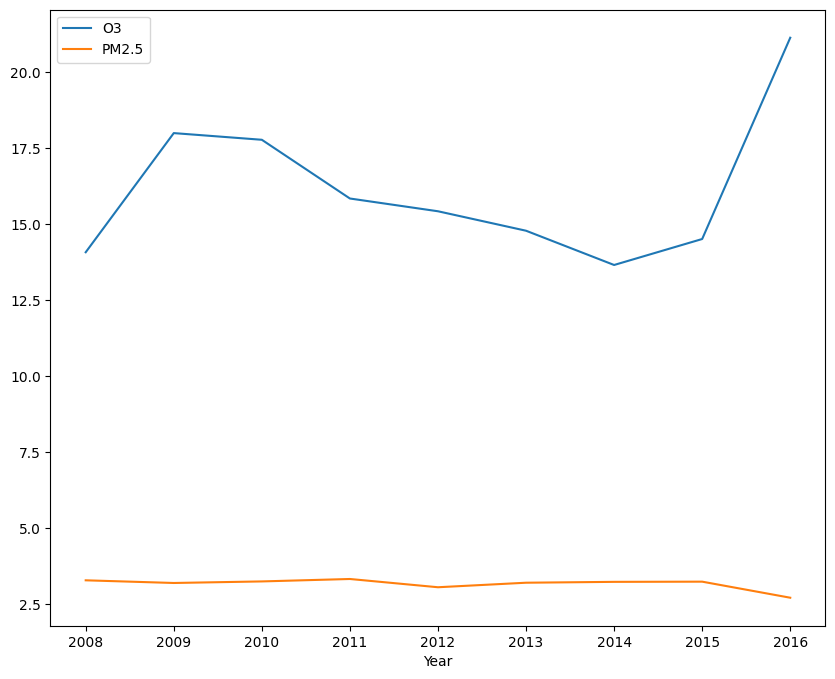

In [29]:
df_delete.groupby("Year")[["O3", "PM2.5"]].mean().plot.line(figsize=(10, 8))
plt.show()

# Misión 4: Categorización

In [30]:
def determinar_categoria(fila, media_O3, std_O3, media_PM25, std_PM25):
    if pd.isnull(fila['Environmental_risk']):
        if fila['O3'] > media_O3:
            if fila['O3'] > media_O3 + 2 * std_O3:
                return 'extremo'
            else:
                if fila['PM2.5'] > media_PM25:
                    if fila['PM2.5'] > media_PM25 + 2 * std_PM25:
                        return 'extremo'
                    else:
                        return 'Alto'
                else:
                    return 'medio'
        else:
            return 'Bajo'
    else:
        return fila['Environmental_risk']

## Dataframe que se corrigió con la media 

In [31]:
df_mean.apply(lambda x: sum(x.isnull()),axis=0) 

Year                    0
Month                   0
Day                     0
O3                      0
PM2.5                   0
Environmental_risk    221
dtype: int64

In [32]:
df_mean['Environmental_risk'].value_counts()

Environmental_risk
medio      1594
Bajo        750
nulo        134
Alto         93
extremo      57
Name: count, dtype: int64

In [33]:
media_O3 = df_mean['O3'].mean()
std_O3 = df_mean['O3'].std()
media_PM25 = df_mean['PM2.5'].mean()
std_PM25 = df_mean['PM2.5'].std()
df_mean['Environmental_risk'] = df_mean.apply(determinar_categoria, args=(media_O3, std_O3, media_PM25, std_PM25), axis=1)

In [34]:
df_mean.apply(lambda x: sum(x.isnull()),axis=0) 

Year                  0
Month                 0
Day                   0
O3                    0
PM2.5                 0
Environmental_risk    0
dtype: int64

In [35]:
df_mean['Environmental_risk'].value_counts()

Environmental_risk
medio      1772
Bajo        791
nulo        134
Alto         93
extremo      59
Name: count, dtype: int64

## Dataframe que se corrigió eliminando filas con valores nulos

In [36]:
df_delete.apply(lambda x: sum(x.isnull()),axis=0) 

Year                  0
Month                 0
Day                   0
O3                    0
PM2.5                 0
Environmental_risk    0
dtype: int64

In [37]:
df_delete['Environmental_risk'].value_counts()

Environmental_risk
medio      1594
Bajo        750
nulo        134
Alto         93
extremo      57
Name: count, dtype: int64

In [38]:
media_O3 = df_delete['O3'].mean()
std_O3 = df_delete['O3'].std()
media_PM25 = df_delete['PM2.5'].mean()
std_PM25 = df_delete['PM2.5'].std()
df_delete['Environmental_risk'] = df_delete.apply(determinar_categoria, args=(media_O3, std_O3, media_PM25, std_PM25), axis=1)

In [39]:
df_delete.apply(lambda x: sum(x.isnull()),axis=0) 

Year                  0
Month                 0
Day                   0
O3                    0
PM2.5                 0
Environmental_risk    0
dtype: int64

In [40]:
df_delete['Environmental_risk'].value_counts()

Environmental_risk
medio      1594
Bajo        750
nulo        134
Alto         93
extremo      57
Name: count, dtype: int64